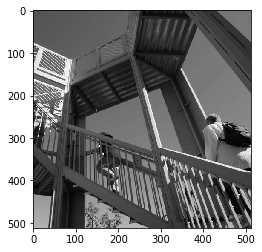

In [1]:
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img = misc.ascent()
plt.gray()
plt.imshow(img)

In [2]:
def plot_images(images, columns = 5):
    plt.figure(figsize=(20,20))    
    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.imshow(image)
        
def apply_filter(image, filter):
    features = img.copy()
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            conv =  img[i-1, j-1] * filter[0][0]
            conv += img[i-1, j  ] * filter[0][1]
            conv += img[i-1, j+1] * filter[0][2]
            conv += img[i  , j-1] * filter[1][0]
            conv += img[i  , j  ] * filter[1][1]
            conv += img[i  , j+1] * filter[1][2]
            conv += img[i+1, j-1] * filter[2][0]
            conv += img[i+1, j  ] * filter[2][1]
            conv += img[i+1, j+1] * filter[2][2]
        
            conv = 0. if min(conv, 255.) < 0 else min(conv, 255.) 
            features[i,j] = conv
    return features

def apply_pooling(image):
    pool_img = np.zeros((image.shape[0] // 2, image.shape[1] // 2))
    for i in range(0, image.shape[0], 2):
        for j in range(0, image.shape[1], 2):
            pool_img[i // 2, j // 2] = np.max(image[i:i+2, j:j+2])
    return pool_img

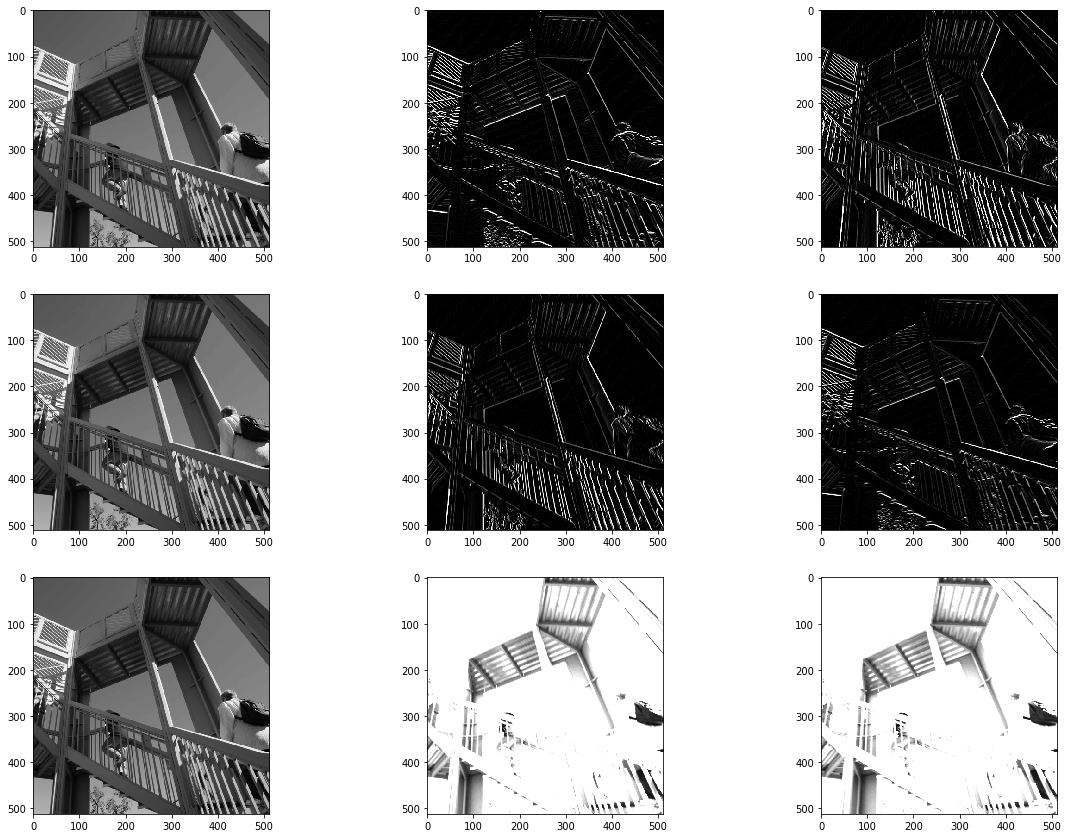

In [3]:
f1 = np.array([[-1, -2, -1], 
               [ 0,  0,  0], 
               [ 1,  2,  1]])

f2 = np.array([[-1,  0,  1], 
               [-1,  0,  1], 
               [-1,  0,  1]])

f3 = np.array([[ 1,  1,  0], 
               [ 0,  1,  0], 
               [ 0,  1,  1]])

img_f1  = apply_filter(img,f1)
img_f1t = apply_filter(img,f1.T)
img_f2  = apply_filter(img,f2)
img_f2t = apply_filter(img,f2.T)
img_f3  = apply_filter(img,f3)
img_f3t = apply_filter(img,f3.T)

plot_images([img, img_f1, img_f1t, 
             img, img_f2, img_f2t, 
             img, img_f3, img_f3t], 3)

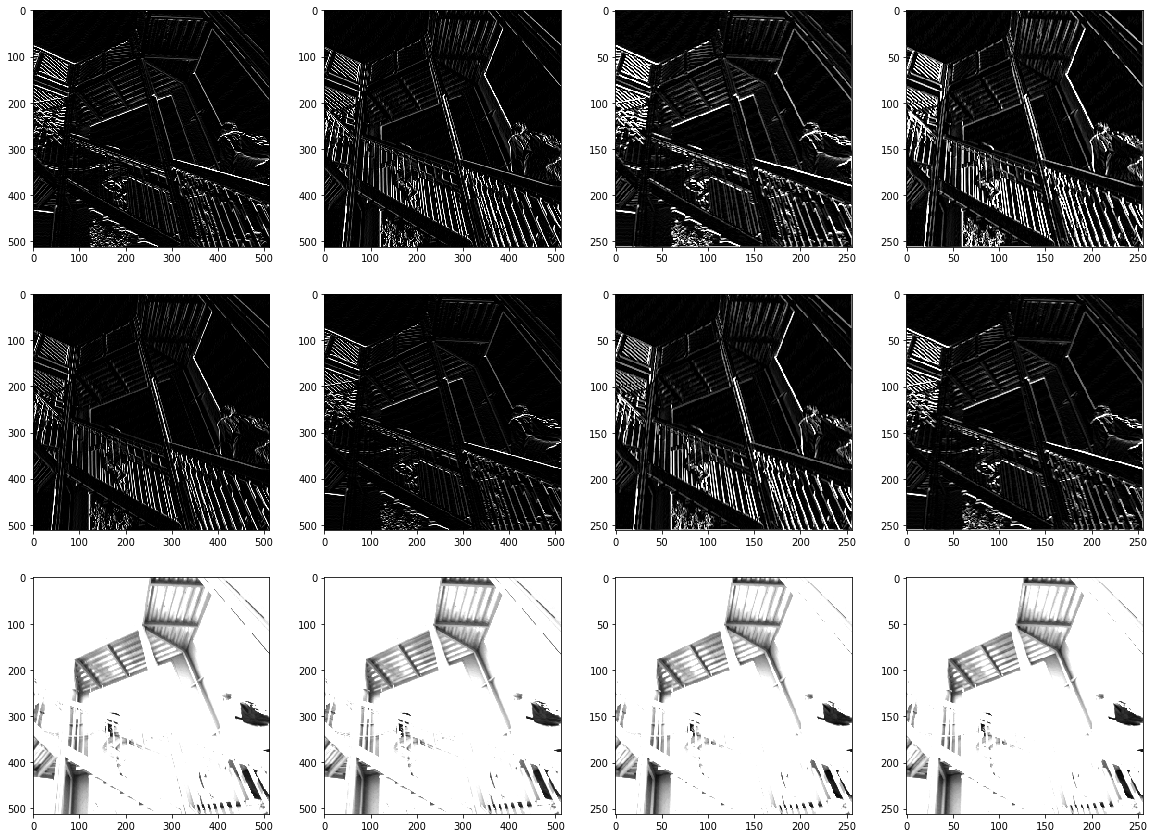

In [4]:
img_f1p  = apply_pooling(img_f1)
img_f1tp = apply_pooling(img_f1t)
img_f2p  = apply_pooling(img_f2)
img_f2tp = apply_pooling(img_f2t)
img_f3p  = apply_pooling(img_f3)
img_f3tp = apply_pooling(img_f3t)

plot_images([img_f1, img_f1t, img_f1p, img_f1tp, 
             img_f2, img_f2t, img_f2p, img_f2tp, 
             img_f3, img_f3t, img_f3p, img_f3tp], 4)

In [5]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255.
x_test = x_test / 255.

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.7564 - acc: 0.7585
Epoch 2/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.5127 - acc: 0.8256
Epoch 3/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4676 - acc: 0.8389
Epoch 4/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.4413 - acc: 0.8469
Epoch 5/5
10000/10000 [==============================] - 0s 25us/sample - loss: 0.4499 - acc: 0.8408


[0.4498846937656403, 0.8408]

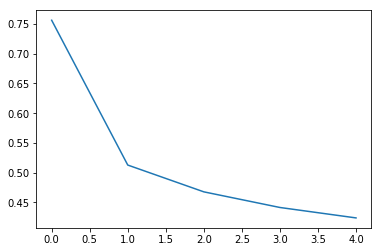

In [6]:
plt.plot(history.history['loss'])

In [7]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 26s 437us/sample - loss: 0.8942 - acc: 0.6788
Epoch 2/5
60000/60000 [==============================] - 27s 443us/sample - loss: 0.5373 - acc: 0.8029
Epoch 3/5
60000/60000 [==============================] - 24s 404us/sample - loss: 0.4667 - acc: 0.8294
Epoch 4/5
60000/60000 [==============================] - 28s 460us/sample - loss: 0.4239 - acc: 0.8461
Epoch 5/5
10000/10000 [==============================] - 1s 143us/sample - loss: 0.3965 - acc: 0.8565


[0.39650364966392515, 0.8565]

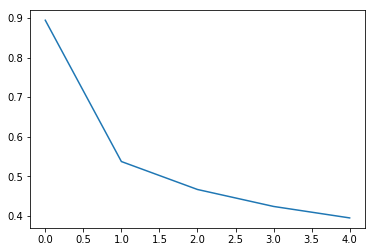

In [8]:
plt.plot(history.history['loss'])

EXERCISES
===

 - Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.
 - Remove the final Convolution. What impact will this have on accuracy or training time?
 - How about adding more Convolutions? What impact do you think this will have? Experiment with it.
 - Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.
 - In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

In [22]:
import time

def build_and_run_model (filter_count = 32, remove_final_conv = False):
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
    x_train = x_train / 255.
    x_test = x_test / 255.
    x_train = x_train.reshape(60000, 28, 28, 1)
    x_test = x_test.reshape(10000, 28, 28, 1)
    
    if remove_final_conv == True:
        model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(filter_count, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPool2D(2, 2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(10, activation='softmax'),
        ])
    else:
        model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(filter_count, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPool2D(2, 2),
            tf.keras.layers.Conv2D(filter_count, (3, 3), activation='relu'),
            tf.keras.layers.MaxPool2D(2, 2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(10, activation='softmax'),
        ]) 
    
    print ("")
    
    model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    tfr = time.perf_counter()
    history = model.fit(x_train, y_train, epochs=1)
    tto = time.perf_counter()
    model.evaluate(x_test, y_test)
    
    print ("Training time: " + str(int(tto-tfr)) + " second")
    #plt.plot(history.history['loss'])
   

In [23]:
build_and_run_model(16)
build_and_run_model(16, True)

build_and_run_model(32)
build_and_run_model(32, True)

build_and_run_model(64)
build_and_run_model(64, True)


10000/10000 [==============================] - 1s 109us/sample - loss: 0.5883 - acc: 0.7828
Training time: 17 second

10000/10000 [==============================] - 1s 94us/sample - loss: 0.5267 - acc: 0.8071
Training time: 15 second

10000/10000 [==============================] - 1s 149us/sample - loss: 0.5763 - acc: 0.7860
Training time: 27 second

10000/10000 [==============================] - 1s 120us/sample - loss: 0.5508 - acc: 0.7899
Training time: 24 second

10000/10000 [==============================] - 3s 300us/sample - loss: 0.6235 - acc: 0.7718
Training time: 56 second

10000/10000 [==============================] - 2s 201us/sample - loss: 0.5075 - acc: 0.8206
Training time: 49 second
